# Simulation d'analyse en composantes principales:

### Importation des modules necessaires:

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement de données:

In [2]:
df = pd.read_excel('datasources/data.xlsx', sheet_name='Données',index_col="Index")
df.head()

,PAO,PAA,VIO,VIA,POT,LEC,RAI,PLP
Index,,,,,,,,
AGRI,167.34,1.37,163,23,41,8,4,6
SAGG,162.00,2.00,141,12,40,12,6,15
PRIN,119.00,6.00,69,56,39,5,13,41
CSUP,87.49,11.00,63,111,27,3,18,39
CMOY,103.00,5.00,68,77,32,4,11,30


In [3]:
# Calcul des statistiques élémentaires
stats = {
    "Minimum": df.min(),
    "Maximum": df.max(),
    "Moyenne": df.mean(),
    "Écart-type": df.std()
}

# Création du DataFrame des statistiques
stats_df = pd.DataFrame(stats)

# Affichage des statistiques élémentaires
stats_df

,Minimum,Maximum,Moyenne,Écart-type
PAO,87.49,167.34,127.22875,27.874559
PAA,1.37,11.00,4.92125,3.119691
VIO,63.00,163.00,96.12500,38.790417
VIA,12.00,111.00,58.87500,31.316073
POT,27.00,53.00,38.62500,7.872874
LEC,3.00,12.00,6.62500,2.825269
RAI,4.00,18.00,10.12500,4.454131
PLP,6.00,41.00,24.37500,12.246720


### Interprétation des Statistiques Élémentaires:
- PAO : Grande variabilité avec une moyenne de 127.23 et un écart-type élevé (27.87).

- PAA : Distribution homogène autour de la moyenne (4.92) avec un écart-type de 3.12.

- VIO : Valeurs très dispersées (moyenne de 96.13, écart-type de 38.79).

- VIA : Variabilité importante avec une moyenne de 58.88 et un écart-type de 31.32.

- POT : Cohérence modérée (moyenne de 38.63, écart-type de 7.87).

- LEC : Faible dispersion, moyenne de 6.63, écart-type de 2.83.

- RAI : Variabilité modérée, moyenne de 10.13, écart-type de 4.45.

- PLP : Dispersion élevée, moyenne de 24.38, écart-type de 12.25.

In [4]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr() * 100

# Affichage de la matrice de corrélation
correlation_matrix

,PAO,PAA,VIO,VIA,POT,LEC,RAI,PLP
PAO,100.000000,-76.283035,92.806329,-90.460268,65.388995,88.715991,-84.380385,-85.639998
PAA,-76.283035,100.000000,-58.686343,90.309056,-33.442340,-67.857014,97.522497,76.119822
VIO,92.806329,-58.686343,100.000000,-75.016070,51.707538,79.172558,-70.538654,-82.798621
VIA,-90.460268,90.309056,-75.016070,100.000000,-41.856612,-83.860212,90.139678,71.979081
POT,65.388995,-33.442340,51.707538,-41.856612,100.000000,60.291886,-41.807945,-55.395606
LEC,88.715991,-67.857014,79.172558,-83.860212,60.291886,100.000000,-73.363451,-75.092306
RAI,-84.380385,97.522497,-70.538654,90.139678,-41.807945,-73.363451,100.000000,88.158772
PLP,-85.639998,76.119822,-82.798621,71.979081,-55.395606,-75.092306,88.158772,100.000000


### Interprétation de la Matrice de Corrélation:

- PAO et VIO (92.81): Forte corrélation positive, indiquant que lorsque PAO augmente, VIO tend également à augmenter.

- PAO et VIA (-90.46): Forte corrélation négative, ce qui signifie que lorsque PAO augmente, VIA diminue généralement.

- PAA et RAI (97.52): Très forte corrélation positive, suggérant une relation très étroite entre ces deux variables.

- VIO et PAA (-58.69): Corrélation négative modérée, indiquant une tendance inverse entre VIO et PAA.

> En résumé: Les coefficients de corrélation fournissent des indications précieuses sur la relation entre les variables. Les valeurs proches de 100 ou -100 indiquent des corrélations fortes, tandis que les valeurs proches de 0 indiquent une faible corrélation. Cette matrice aide à comprendre comment les variables sont liées entre elles.

In [5]:
# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Application de la PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Valeurs propres (eigenvalues)
eigenvalues = pca.explained_variance_

# Pourcentage de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# Variance cumulée
cumulative_variance = np.cumsum(explained_variance_ratio)

# Création de la table diagonalisation
diagonalisation_data = {
    "Valeur Propre": eigenvalues,
    "Pour-cent": explained_variance_ratio,
    "Cumul": cumulative_variance
}

# Affichage des options de format pour les floats 
pd.options.display.float_format = '{:,.3f}'.format

diagonalisation_df = pd.DataFrame(diagonalisation_data)

# Affichage de la table diagonalisation
diagonalisation_df

,Valeur Propre,Pour-cent,Cumul
0,7.085,77.490,77.490
1,1.007,11.014,88.504
2,0.481,5.264,93.768
3,0.379,4.142,97.911
4,0.169,1.851,99.762
5,0.022,0.236,99.998
6,0.000,0.002,100.000
7,0.000,0.000,100.000


### Interprétation:
- Les deux premières composantes principales capturent à elles seules environ 88.504% de la variance totale des données, ce qui signifie qu'elles contiennent l'essentiel de l'information. Les composantes suivantes ajoutent peu de variance expliquée, suggérant qu'elles sont moins importantes pour résumer les données.

In [6]:
# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Application de la PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Création d'un DataFrame pour les composants principaux
principal_df = pd.DataFrame(data=principal_components, index=df.index, columns=['PC1', 'PC2'])

# Calcul de la moyenne des consommations
moyenne = df.mean()

# Ajout de la catégorie fictive
df.loc['Fictive'] = moyenne

# Ré-application de la standardisation et de la PCA avec la catégorie fictive
scaled_data = scaler.fit_transform(df)
principal_components = pca.fit_transform(scaled_data)

# Mise à jour du DataFrame des composants principaux
principal_df = pd.DataFrame(data=principal_components, index=df.index, columns=['PC1', 'PC2'])

principal_df

,PC1,PC2
Index,,
AGRI,-3.745,-0.430
SAGG,-3.551,-0.268
PRIN,1.563,0.083
CSUP,4.626,0.213
CMOY,1.817,-0.937
EMPL,0.851,-0.866
OUVR,-0.963,-0.232
INAC,-0.599,2.437
Fictive,0.000,0.000


### Interprétation:
- Les deux premiers axes principaux (PC1 et PC2) révèlent comment les différentes catégories se positionnent dans l'espace des composantes principales. Les catégories avec des valeurs extrêmes (positives ou négatives) sur PC1 ou PC2 contribuent fortement à ces axes, tandis que celles avec des valeurs proches de zéro ont une influence moindre.

Cela permet de visualiser la distribution des données et de comprendre les relations entre les différentes catégories.

C:\Users\medth\AppData\Local\Temp\ipykernel_808\2295274092.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (principal_df['PC1'][i], principal_df['PC2'][i]), fontsize=12)


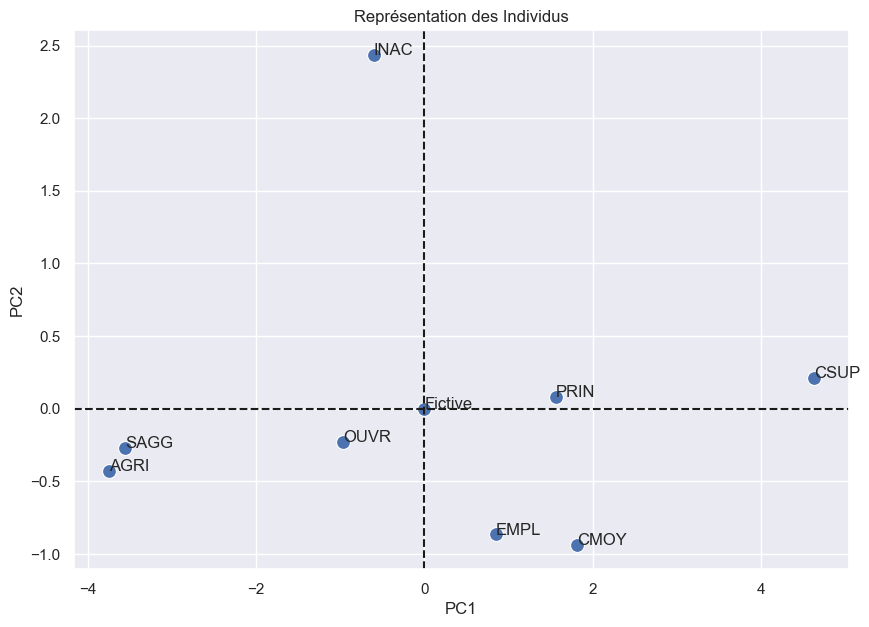

In [7]:
# Configuration de Seaborn
sns.set_theme(style="darkgrid")

# Création de la figure
plt.figure(figsize=(10, 7))

# Ajout des points individuels avec Seaborn
sns.scatterplot(x='PC1', y='PC2', data=principal_df, s=100, color="b")

# Annotation des points
for i, txt in enumerate(principal_df.index):
    plt.annotate(txt, (principal_df['PC1'][i], principal_df['PC2'][i]), fontsize=12)

# Ajout des lignes des axes
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

# Titres et légendes
plt.title('Représentation des Individus')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Affichage de la figure
plt.show()

### Interprétation:
- Ce plot permet de visualiser les similarités et différences entre les catégories en fonction des deux principales composantes. Les catégories positionnées à l'extrême de chaque composante (PC1 ou PC2) ont une influence significative, tandis que celles proches de l'origine ont une influence moindre.

In [8]:
# Application de la PCA 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data) 
# Mise à jour du DataFrame avec les composants principaux 
principal_df = pd.DataFrame(data=principal_components, index=df.index, columns=['F1', 'F2'])

# Calcul de la qualité de la représentation (QLT)
qlt = np.square(principal_components).sum(axis=1)

# Calcul du cosinus carré (CO2)
co2 = np.square(principal_components) * 1000 / qlt[:, np.newaxis]

# Calcul de la contribution (CTR)
ctr = np.square(principal_components) * 1000 / np.sum(np.square(scaled_data))

# Création de la table des Coordonnées des Individus sur les Axes Principaux
table_cord = pd.DataFrame({
    "QLT": qlt,
    "F1": principal_df['F1'],
    "CO2_F1": co2[:, 0],
    "CTR_F1": ctr[:, 0],
    "F2": principal_df['F2'],
    "CO2_F2": co2[:, 1],
    "CTR_F2": ctr[:, 1]
}, index=df.index)

# Affichage de la table finale
table_cord

,QLT,F1,CO2_F1,CTR_F1,F2,CO2_F2,CTR_F2
Index,,,,,,,
AGRI,14.210,-3.745,987.011,194.803,-0.430,12.989,2.564
SAGG,12.681,-3.551,994.317,175.124,-0.268,5.683,1.001
PRIN,2.451,1.563,997.181,33.949,0.083,2.819,0.096
CSUP,21.445,4.626,997.890,297.214,0.213,2.110,0.628
CMOY,4.181,1.817,789.982,45.877,-0.937,210.018,12.196
EMPL,1.475,0.851,491.363,10.064,-0.866,508.637,10.418
OUVR,0.982,-0.963,945.336,12.891,-0.232,54.664,0.745
INAC,6.298,-0.599,56.911,4.978,2.437,943.089,82.492
Fictive,0.000,0.000,437.498,0.000,0.000,562.502,0.000


### Interprétation:
- CSUP est bien représenté par F1 avec une haute qualité et forte contribution.

- INAC se distingue sur F2 avec une contribution significative.

- AGRI et SAGG montrent une forte influence sur F1.

- EMPL a la plus faible qualité de représentation, et Fictive est un cas moyen théorique.

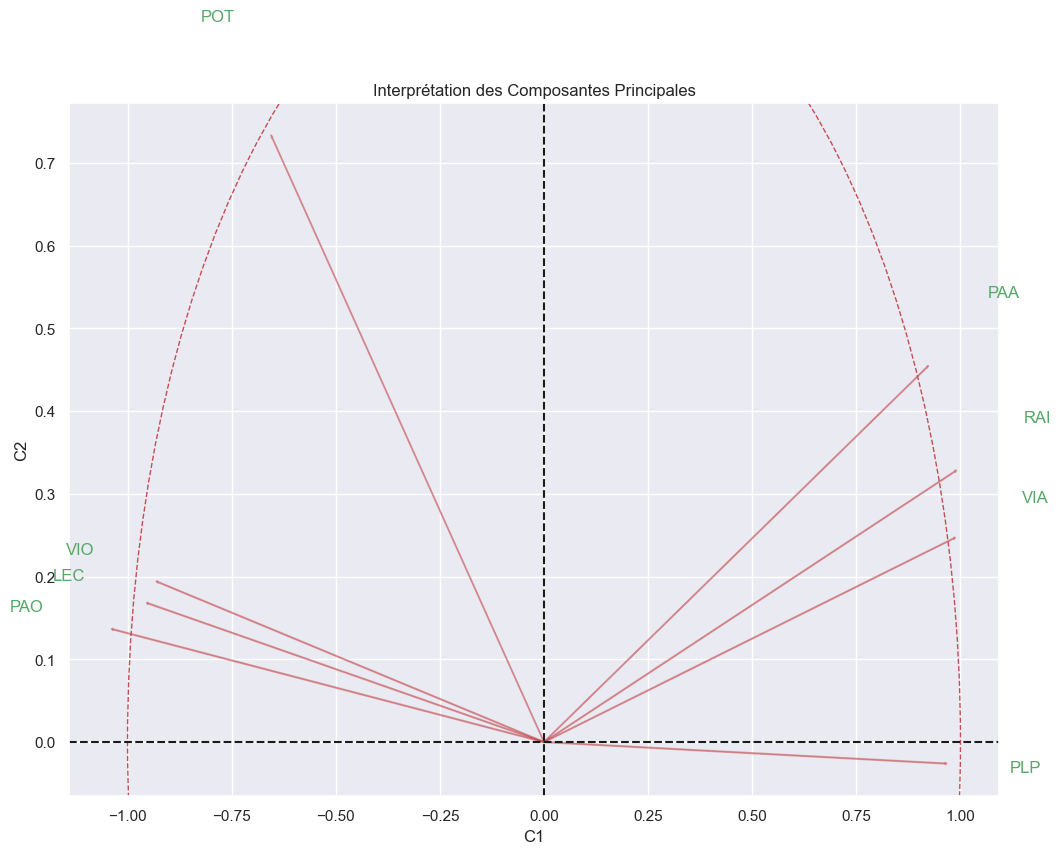

In [9]:
# Ajout de la catégorie fictive 
df.loc['Fictive'] = df.mean()

# Ré-application de la standardisation et de la PCA avec la catégorie fictive 
scaled_data = scaler.fit_transform(df) 
principal_components = pca.fit_transform(scaled_data) 

# Mise à jour du DataFrame des composants principaux 
principal_df = pd.DataFrame(data=principal_components, index=df.index, columns=['C1', 'C2'])

# Calcul des charges des composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Création d'un DataFrame pour les charges
loadings_df = pd.DataFrame(data=loadings, columns=['C1', 'C2'], index=df.columns)

# Configuration de Seaborn
sns.set_theme(style="darkgrid")

# Création de la figure
plt.figure(figsize=(12, 9))

# Ajout des vecteurs des variables d'origine
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, df.columns[i], color='g', ha='center', va='center', fontsize=12)

# Ajout des lignes des axes
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

# Ajout d'un cercle centré à l'origine
circle = plt.Circle((0, 0), radius=1, color='r', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Titres et légendes
plt.title("Interprétation des Composantes Principales")
plt.xlabel('C1')
plt.ylabel('C2')

# Affichage de la figure
plt.show()

### Synthèse générale :
L’analyse en composantes principales (ACP) permet ici de comprendre :
- Comment les catégories d'individus se différencient par leurs habitudes de consommation.
- Quelles variables expliquent le plus ces différences (par leur position dans le cercle des corrélations et leur contribution aux axes principaux).
- Les deux premiers axes sont suffisants pour interpréter l'essentiel de l'information.